# Logistic_Regression - Bank Problem 
## --------------------------------------------------------------------------------------------------------------------------------

## Problem Statement :- To check Output variable -> y (Whether the client has subscribed a term deposit or not )

## Binomial ("yes" or "no")

### Attribute information For bank dataset

### Input variables:

#### bank client data:
  * 1 - age (numeric) ** 
  * 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
  * 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  * 4 - education (categorical: "unknown","secondary","primary","tertiary")
  * 5 - default: has credit in default? (binary: "yes","no")
  * 6 - balance: average yearly balance, in euros (numeric) 
  * 7 - housing: has housing loan? (binary: "yes","no")
  * 8 - loan: has personal loan? (binary: "yes","no")
   
####  related with the last contact of the current campaign:
  * 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  * 10 - day: last contact day of the month (numeric)
  * 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  * 12 - duration: last contact duration, in seconds (numeric)
  
#### other attributes:
  * 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  * 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1   means client was not previously contacted)
  * 15 - previous: number of contacts performed before this campaign and for this client (numeric)
  * 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

#### Output variable (desired target):
  * 17 - y - has the client subscribed a term deposit? (binary: "yes","no")
  
**Missing Attribute Values: None**

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1. Import libraries :

In [136]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## 2. Import dataset :

In [137]:
bank_data = pd.read_csv('bank-full.csv',sep=';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## 3. Data Understanding :

### 3.1 Initial Analysis :

In [138]:
bank_data.shape

(45211, 17)

In [139]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [140]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [141]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [142]:
bank_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


### 3.2 EDA :
* Exploring all the categorical data

In [143]:
bank_data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [144]:
bank_data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [145]:
bank_data.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [146]:
bank_data.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [147]:
bank_data.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [148]:
bank_data.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

## 4. Data Pre-processing :

### 4.1 Data Transformation :

In [149]:
pd.set_option('max_columns',None)

In [150]:
bank_data_copy = bank_data.copy()
bank_data_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


##### I. Categorical data transformation

In [151]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bank_data_copy['job'] = le.fit_transform(bank_data_copy['job'])
bank_data_copy['marital'] = le.fit_transform(bank_data_copy['marital'])
bank_data_copy['education'] = le.fit_transform(bank_data_copy['education'])
bank_data_copy['contact'] = le.fit_transform(bank_data_copy['contact'])
bank_data_copy['poutcome'] = le.fit_transform(bank_data_copy['poutcome'])
bank_data_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,no,2143,yes,no,2,5,may,261,1,-1,0,3,no
1,44,9,2,1,no,29,yes,no,2,5,may,151,1,-1,0,3,no
2,33,2,1,1,no,2,yes,yes,2,5,may,76,1,-1,0,3,no
3,47,1,1,3,no,1506,yes,no,2,5,may,92,1,-1,0,3,no
4,33,11,2,3,no,1,no,no,2,5,may,198,1,-1,0,3,no


#### Understanding the Label encoding technique transformation :

###### Here the transformation is Label Encoding technique and the transformation is as follows based on alphabetical order they are numbered : 

##### 1. Job column transformation :

In [152]:
bank_data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [153]:
bank_data_copy.job.unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])


    * admin        - 0 
    * blue-collar  - 1
    * entrepreneur - 2
    * housemaid    - 3
    * retired      - 5
    * self-employed- 6
    * services     - 7
    * student      - 8
    * technician   - 9
    * unemployed   - 10
    * unknown      - 11

#### 2. Marital column trnsformation :

In [154]:
  bank_data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [155]:
bank_data_copy.marital.unique()

array([1, 2, 0])

    * divorced   - 0
    * married    - 1
    * single     - 2

#### 3. Education  column transformation :

In [156]:
bank_data.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [157]:
bank_data_copy.education.unique()

array([2, 1, 3, 0])

    * primary    - 0
    * secondary  - 1
    * tertiary   - 2
    * unknown    - 3

#### 4. Contact column transformation:

In [158]:
bank_data.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [159]:
bank_data_copy.contact.unique()

array([2, 0, 1])

    * cellular   - 0
    * telephone  - 1
    * unknown    - 2

#### 5. Poutcome column trnsformation :

In [160]:
bank_data.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [161]:
bank_data_copy.poutcome.unique()

array([3, 0, 1, 2])

    * failure   - 0
    * other     - 1
    * success   - 2
    * unknown   - 3

##### II. Binomial data transformation :

In [162]:
bank_data_copy['default'] = le.fit_transform(bank_data_copy['default'])
bank_data_copy['housing'] = le.fit_transform(bank_data_copy['housing'])
bank_data_copy['loan'] = le.fit_transform(bank_data_copy['loan'])
bank_data_copy['y'] = le.fit_transform(bank_data_copy['y'])
bank_data_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0


#####  Understanding the binomial data transformation :

* For the binomial data transformation we have 'yes' or 'no' so they are transformed as follows :
    * yes - 1
    * no  - 0

##### III. Changing the month from string to integer type

In [163]:
bank_data.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [164]:
#Index values are set n order wise and now we have to replace it with our dataset.

index_months={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [165]:
# It checks the values and where it matches the string value is replaced with the number corresponding to it

bank_data_copy= bank_data_copy.replace(index_months)

In [166]:
bank_data_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,3,0


### 4.2 Checking the dataset after transformation :

In [167]:
bank_data_copy.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
y            int32
dtype: object

In [168]:
bank_data_copy.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [169]:
bank_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(9), int64(8)
memory usage: 4.3 MB


In [170]:
bank_data_copy.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


## 5. Model Building :

In [171]:
X = bank_data_copy.drop(labels= 'y',axis = 1)
y = bank_data_copy[['y']]

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 12)

In [173]:
X_train.shape, y_train.shape

((36168, 16), (36168, 1))

In [174]:
X_test.shape , y_test.shape

((9043, 16), (9043, 1))

## 6. Model Training :

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [177]:
logistic_model.intercept_

array([-0.0900338])

In [178]:
coefficients = np.array(logistic_model.coef_).T
coefficients

array([[-2.29804941e-02],
       [ 5.29800871e-02],
       [-1.23430576e-01],
       [-1.44519265e-02],
       [-5.58097645e-03],
       [ 3.51499028e-05],
       [-2.44933868e-01],
       [-6.67121643e-02],
       [-2.90319765e-01],
       [-1.67291687e-02],
       [-7.52673878e-02],
       [ 3.44452752e-03],
       [-3.07366903e-01],
       [-1.25970025e-03],
       [ 1.20183656e-01],
       [-2.28868518e-01]])

In [179]:
coefficients_df= pd.DataFrame(coefficients,columns=['Coefficeints'],index= ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome',])
coefficients_df

,Coefficeints
age,-0.022980
job,0.052980
marital,-0.123431
education,-0.014452
default,-0.005581
balance,0.000035
housing,-0.244934
loan,-0.066712
contact,-0.290320
day,-0.016729


## 7. Model Testing :

### 7.1 Training data

In [180]:
y_predict_train = logistic_model.predict(X_train)
y_predict_train

array([0, 0, 1, ..., 0, 0, 1])

### 7.2 Test data

In [181]:
y_predict_test =logistic_model.predict(X_test)
y_predict_test

array([0, 0, 0, ..., 0, 0, 0])

## 8. Model Evaluation :

In [182]:
from sklearn.metrics import accuracy_score,precision_score,classification_report,recall_score,confusion_matrix,roc_auc_score,roc_curve,auc

### 8.1 Training Accuracy :

In [183]:
accuracy_score(y_train,y_predict_train)

0.8865571776155717

In [184]:
precision_score(y_train,y_predict_train)

0.5524691358024691

In [185]:
recall_score(y_train,y_predict_train)

0.16890776126444917

In [186]:
print(confusion_matrix(y_train,y_predict_train))

[[31349   580]
 [ 3523   716]]


In [187]:
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.55      0.17      0.26      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [188]:
from sklearn.metrics import roc_curve,roc_auc_score

In [189]:
fpr, tpr, thresholds =roc_curve(y,logistic_model.predict_proba(X)[:,1])
auc_train = roc_auc_score(y_train, y_predict_train)
print(auc_train)

0.5753712284978013


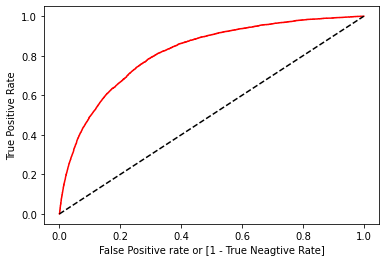

In [190]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red', label='logistic model (area = %0.2f)'%auc_train)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive rate or [1 - True Neagtive Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [191]:
print('TRAINING DATA ANALYSIS')
print('\n----------------------------------------------------')
print('Accuracy Score   :', round(accuracy_score(y_train,y_predict_train),5))
print('Precision Score  :',round(precision_score(y_train,y_predict_train),5))
print('Recall Score     :',round(recall_score(y_train,y_predict_train),5))
print('AUC score        :',round(auc_train,5))
print('Confusion Matrix :\n',confusion_matrix(y_train,y_predict_train))

TRAINING DATA ANALYSIS

----------------------------------------------------
Accuracy Score   : 0.88656
Precision Score  : 0.55247
Recall Score     : 0.16891
AUC score        : 0.57537
Confusion Matrix :
 [[31349   580]
 [ 3523   716]]


### 8.2 Test Accuracy :

In [192]:
accuracy_score(y_test,y_predict_test)

0.8884219838549154

In [193]:
precision_score(y_test,y_predict_test)

0.5587392550143266

In [194]:
recall_score(y_test,y_predict_test)

0.18571428571428572

In [195]:
print(confusion_matrix(y_test,y_predict_test))

[[7839  154]
 [ 855  195]]


In [196]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.56      0.19      0.28      1050

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [197]:
fpr, tpr, thresholds =roc_curve(y,logistic_model.predict_proba(X)[:,1])
auc_test = roc_auc_score(y_test, y_predict_test)
print(auc_test)

0.5832237136065486


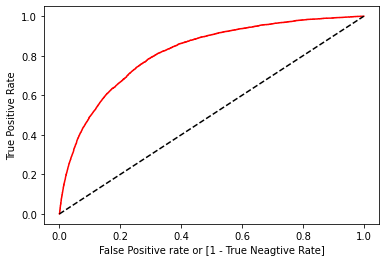

In [198]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red', label='logistic model (area = %0.2f)'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive rate or [1 - True Neagtive Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [199]:
print('TEST DATA ANALYSIS')
print('\n----------------------------------------------------')
print('Accuracy Score   :', round(accuracy_score(y_test,y_predict_test),5))
print('Precision Score  :',round(precision_score(y_test,y_predict_test),5))
print('Recall Score     :',round(recall_score(y_test,y_predict_test),5))
print('AUC score        :',round(auc_test,5))
print('Confusion Matrix :\n',confusion_matrix(y_test,y_predict_test))

TEST DATA ANALYSIS

----------------------------------------------------
Accuracy Score   : 0.88842
Precision Score  : 0.55874
Recall Score     : 0.18571
AUC score        : 0.58322
Confusion Matrix :
 [[7839  154]
 [ 855  195]]


## 9. Model Deployement :

In [200]:
from pickle import dump

In [201]:
dump(logistic_model,open('Logistic_regression_1.pkl','wb'))

In [202]:
from pickle import load

In [203]:
loaded_pkl_file = load(open('Logistic_regression_1.pkl','rb'))

In [204]:
predicted_pkl_file = loaded_pkl_file.predict(X_test)

In [205]:
accuracy_score(y_test,predicted_pkl_file)

0.8884219838549154

In [206]:
precision_score(y_test,predicted_pkl_file)

0.5587392550143266

In [207]:
recall_score(y_test,predicted_pkl_file)

0.18571428571428572

In [208]:
print(classification_report(y_test,predicted_pkl_file))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.56      0.19      0.28      1050

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [209]:
print(confusion_matrix(y_test,predicted_pkl_file))

[[7839  154]
 [ 855  195]]


In [210]:
fpr, tpr, thresholds =roc_curve(y,logistic_model.predict_proba(X)[:,1])
auc_pkl= roc_auc_score(y_test, predicted_pkl_file)
print(auc_pkl)

0.5832237136065486


In [211]:
print('DEPLOYED MODEL DATA ANALYSIS')
print('\n----------------------------------------------------')
print('Accuracy Score   :', round(accuracy_score(y_test,predicted_pkl_file),5))
print('Precision Score  :',round(precision_score(y_test,predicted_pkl_file),5))
print('Recall Score     :',round(recall_score(y_test,predicted_pkl_file),5))
print('AUC score        :',round(auc_pkl,5))
print('Confusion Matrix :\n',confusion_matrix(y_test,predicted_pkl_file))

DEPLOYED MODEL DATA ANALYSIS

----------------------------------------------------
Accuracy Score   : 0.88842
Precision Score  : 0.55874
Recall Score     : 0.18571
AUC score        : 0.58322
Confusion Matrix :
 [[7839  154]
 [ 855  195]]


# -----------------------END OF LIFE CYCLE----------------------------------------------------- 